In [1]:
import pandas as pd
import dask as dd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as smf



/usr/local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_csv('JV_data_2002-2012.csv')

In [3]:
df['pdynamic'] = df['pdynamic'].map({'new_entrant': 1, 'incumbent': 0})
df['disc_dist'] = pd.to_numeric(df['disc_dist'])

## Assumption Testing

1. Appropriate outcome type
2. Linearity of independent variables and log-odds
3. No strongly influential outliers
4. Absence of multicollinearity
5. Independence of observations
6. Sufficiently large sample size

### Assumption 2: Continuous IV is linearly related to the log odds

Text(0.5, 1.0, 'Disc_dist Log Odds Linear Plot')

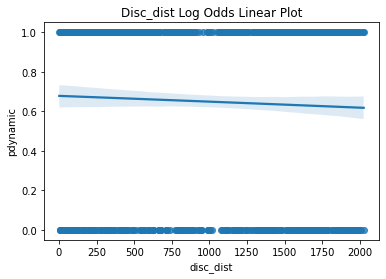

In [4]:
gre = sns.regplot(x= 'disc_dist', y= 'pdynamic', data= df, logistic= True).set_title("Disc_dist Log Odds Linear Plot")
gre

In [6]:
#Prep data to R 

df.to_csv('prepped-r.csv')

#### Perform a Box-Tidwell transofrmation test

### Assumption 3: Lack of outliers

## Logistic Regression Model

In [13]:
model = smf.logit(formula="pdynamic~ disc_dist", data= df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.647813
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               pdynamic   No. Observations:                  989
Model:                          Logit   Df Residuals:                      987
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jun 2022   Pseudo R-squ.:                0.001209
Time:                        23:56:22   Log-Likelihood:                -640.69
converged:                       True   LL-Null:                       -641.46
Covariance Type:            nonrobust   LLR p-value:                    0.2129
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7473      0.129      5.790      0.000       0.494       1.000
disc_dist     -0.0001      0.000     -1.244      0.213      -0.000    7.54e-05
==============================================================================
"""